# RNN

## RNN 의사코드 + numpy 구현

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

In [2]:
import numpy as np

In [4]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
    
fianl_output_sequence = np.stack(successive_outputs, axis = 0)

## Keras RNN

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### IMDB 리뷰 분류

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("data loading ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), "train sequence")
print(len(input_test), "test sequence")

print("sequence pading (samples x time)")
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test =sequence.pad_sequences(input_test, maxlen=maxlen)
print("input_train size : ", input_train.shape)
print("input_test zie : ",input_test.shape)

data loading ...
25000 train sequence
25000 test sequence
sequence pading (samples x time)
input_train size :  (25000, 500)
input_test zie :  (25000, 500)


In [11]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6459 - acc: 0.6126 - val_loss: 0.5790 - val_acc: 0.7074
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4170 - acc: 0.8220 - val_loss: 0.4072 - val_acc: 0.8236
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.3043 - acc: 0.8778 - val_loss: 0.3550 - val_acc: 0.8472
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2432 - acc: 0.9050 - val_loss: 0.3963 - val_acc: 0.8174
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1924 - acc: 0.9271 - val_loss: 0.4350 - val_acc: 0.8534
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1480 - acc: 0.9467 - val_loss: 0.3735 - val_acc: 0.8558
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1057 - acc: 0.9634 - val_loss: 0.4178 - val_acc:

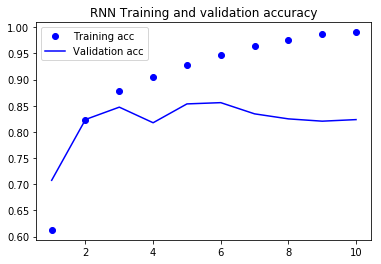

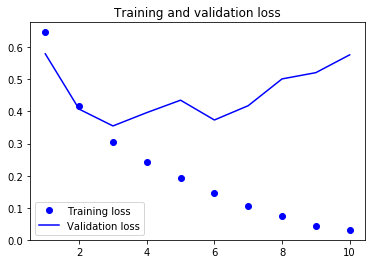

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('RNN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM

## LSTM의사코드

In [ ]:
output_t = activation(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

ct + 1 = i_t * k_t + c_t * f_t

## Keras로 LSTM 구현

In [15]:
from keras.layers import LSTM

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
histroy = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.5050 - acc: 0.7634 - val_loss: 0.4470 - val_acc: 0.7830
Epoch 2/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.2904 - acc: 0.8863 - val_loss: 0.3653 - val_acc: 0.8412
Epoch 3/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.2307 - acc: 0.9125 - val_loss: 0.3287 - val_acc: 0.8848
Epoch 4/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1946 - acc: 0.9284 - val_loss: 0.6892 - val_acc: 0.7944
Epoch 5/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.1762 - acc: 0.9359 - val_loss: 0.2975 - val_acc: 0.8914
Epoch 6/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1549 - acc: 0.9419 - val_loss: 0.3620 - val_acc: 0.8548
Epoch 7/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1436 - acc: 0.9483 - val_loss: 0.2997 - v

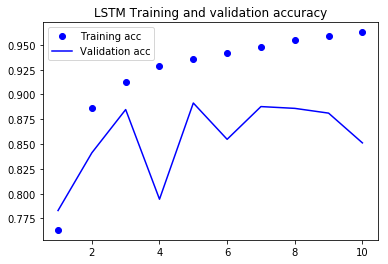

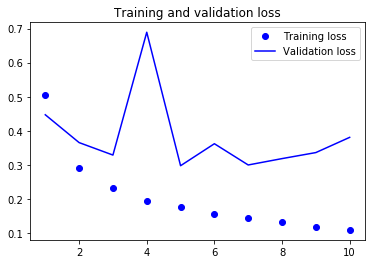

In [24]:
acc = histroy.history['acc']
val_acc = histroy.history['val_acc']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
